# NBackModelNotebook

In [3]:
from psyneulink.library.models.Beukers_et_al_2022.nback import \
    construct_model, train_network, run_model, analyze_results
from psyneulink import *

In [4]:
MAX_NBACK_LEVELS = 3
NUM_STIM = 8 # number of different stimuli in stimulus set -  QUESTION: WHY ISN"T THIS EQUAL TO STIM_SIZE OR VICE VERSA?
FFN_TRANSFER_FUNCTION = ReLU

### Constructor parameters:  (values are from nback-paper)

In [5]:
STIM_SIZE = 8                            # length of stimulus vector
CONTEXT_SIZE = 25                        # length of context vector
HIDDEN_SIZE = STIM_SIZE*4                # dimension of hidden units in ff
NBACK_LEVELS = [2,3]                     # Currently restricted to these
NUM_NBACK_LEVELS = len(NBACK_LEVELS)
CONTEXT_DRIFT_NOISE = 0.0                # noise used by DriftOnASphereIntegrator (function of Context mech)
RANDOM_WEIGHTS_INITIALIZATION=\
    RandomMatrix(center=0.0, range=0.1)  # Matrix spec used to initialize all Projections
RETRIEVAL_SOFTMAX_TEMP = 1/8             # express as gain # precision of retrieval process
RETRIEVAL_HAZARD_RATE = 0.04             # rate of re=sampling of em following non-match in a pass through ffn
RETRIEVAL_STIM_WEIGHT = 0.05             # weighting of stimulus field in retrieval from em
RETRIEVAL_CONTEXT_WEIGHT \
    = 1-RETRIEVAL_STIM_WEIGHT            # weighting of context field in retrieval from em
DECISION_SOFTMAX_TEMP=1

### Training parameters:

In [6]:
NUM_EPOCHS = 6250    # nback-paper: 400,000 @ one trial per epoch = 6,250 @ 64 trials per epoch
LEARNING_RATE =0.001  # nback-paper: .001

#### Execution parameters:
CONTEXT_DRIFT_RATE=.1 # drift rate used for DriftOnASphereIntegrator (function of Context mech) on each trial
NUM_TRIALS = 48 # number of stimuli presented in a trial sequence
REPORT_OUTPUT = ReportOutput.OFF   # Sets console output during run
REPORT_PROGRESS = ReportProgress.OFF  # Sets console progress bar during run
ANIMATE = False # {UNIT:EXECUTION_SET} # Specifies whether to generate animation of execution

### Names of Compositions and Mechanisms:

In [7]:
NBACK_MODEL = "N-back Model"
FFN_COMPOSITION = "WORKING MEMORY (fnn)"
FFN_STIMULUS_INPUT = "CURRENT STIMULUS"
FFN_CONTEXT_INPUT = "CURRENT CONTEXT"
FFN_STIMULUS_RETRIEVED = "RETRIEVED STIMULUS"
FFN_CONTEXT_RETRIEVED = "RETRIEVED CONTEXT"
FFN_TASK = "CURRENT TASK"
FFN_HIDDEN = "HIDDEN LAYER"
FFN_OUTPUT = "DECISION LAYER"
MODEL_STIMULUS_INPUT ='STIM'
MODEL_CONTEXT_INPUT = 'CONTEXT'
MODEL_TASK_INPUT = "TASK"
EM = "EPISODIC MEMORY (dict)"
CONTROLLER = "READ/WRITE CONTROLLER"

## Construct the model:

In [8]:
clear_registry()
nback_model = construct_model(stim_size=10 # Size of stimulus input layer
                              )

constructing 'WORKING MEMORY (fnn)'...
constructing 'nback Model'...
full model constructed


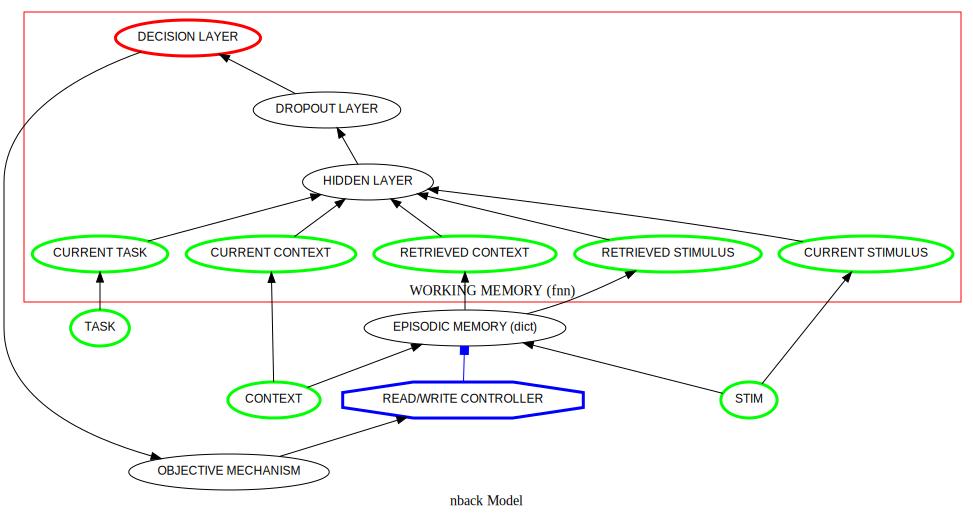

In [29]:
nback_model.show_graph(output_fmt='jupyter')

## Train the model:

In [9]:
ffn = nback_model.nodes['WORKING MEMORY (fnn)']
train_network(ffn, num_epochs=100)

constructing training set for 'WORKING MEMORY (fnn)'...
num training stimuli per training set (minibatch size): 64
num weight updates (num_epochs): 100
total num trials: 6400

training 'WORKING MEMORY (fnn)'...


RunError: 'Input stimulus ([[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]\n [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]\n [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]]) for CURRENT STIMULUS is incompatible with the shape of its external input ([0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]).'

## Run the model:

In [11]:
results = run_model(nback_model)

NameError: name 'nback_model' is not defined

## Analyze the results:

In [ ]:
coded_responses, stats = analyze_results(results,
                                         num_trials=NUM_TRIALS,
                                         nback_levels=NBACK_LEVELS)

